In [475]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [476]:
url = 'https://min-api.cryptocompare.com/data/histominute' +\
        '?fsym=BTC' +\
        '&tsym=USD' +\
        '&limit=2000' +\
        '&aggregate=1'
response = requests.get(url)
data = response.json()['Data']

df = pd.DataFrame(data)
df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]

In [477]:
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1622146860,38772.02,38726.43,38726.43,12.010,465354.88,38769.58,direct,,2021-05-27 20:21:00
1,1622146920,38777.63,38749.50,38769.58,20.580,797590.69,38752.80,direct,,2021-05-27 20:22:00
2,1622146980,38752.80,38678.44,38752.80,18.490,715910.05,38680.13,direct,,2021-05-27 20:23:00
3,1622147040,38703.52,38673.82,38680.13,7.645,295761.66,38677.98,direct,,2021-05-27 20:24:00
4,1622147100,38705.72,38677.98,38677.98,7.136,276085.75,38687.13,direct,,2021-05-27 20:25:00
...,...,...,...,...,...,...,...,...,...,...
1996,1622266620,36964.11,36926.86,36958.26,14.600,539285.40,36940.07,direct,,2021-05-29 05:37:00
1997,1622266680,36942.68,36919.38,36940.07,10.820,399373.15,36937.15,direct,,2021-05-29 05:38:00
1998,1622266740,37043.91,36926.01,36937.15,24.970,923694.58,37043.91,direct,,2021-05-29 05:39:00
1999,1622266800,37078.86,36966.79,37043.91,31.520,1167061.20,37001.49,direct,,2021-05-29 05:40:00


In [478]:
df.describe()

,time,high,low,open,volumefrom,volumeto,close
count,2.001000e+03,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03,2001.000000
mean,1.622207e+09,36820.666447,36746.915602,36782.802839,72.302217,2.647598e+06,36781.918091
std,3.466700e+04,1073.540470,1081.405374,1078.721454,222.946023,8.178715e+06,1077.833752
min,1.622147e+09,34837.370000,34733.760000,34742.430000,0.000000,0.000000e+00,34742.430000
25%,1.622177e+09,36052.030000,35961.580000,36003.000000,21.460000,8.013275e+05,36003.000000
50%,1.622207e+09,36566.880000,36474.770000,36525.470000,36.970000,1.354257e+06,36525.790000
75%,1.622237e+09,37587.860000,37535.210000,37567.830000,64.210000,2.358526e+06,37555.530000
max,1.622267e+09,39190.390000,39122.690000,39188.040000,5892.300000,2.104329e+08,39188.040000


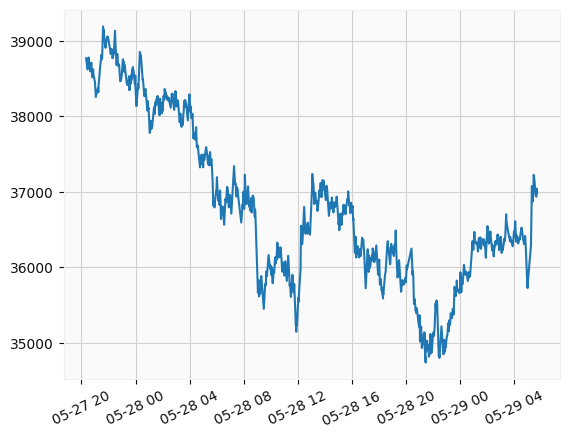

In [479]:
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=25)
plt.show()

### Indicators calc

#### Explore pandas_ta lib

In [480]:
import pandas_ta as ta

In [498]:
df3 = df.copy()
# df3.ta.adjusted = 'Close'
df3.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.2.45b0
Total Indicators: 133
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_doji, cdl_inside, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decay, decreasing, dema, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, kama, kc, kdj, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, ssf, stdev, stoch, stochrsi, supertrend, swma, t3, tema, thermo, trend_return, trima, trix, true_range, tsi, ttm_trend, ui, uo, variance, vidya, vortex, vp, vwap, vwma, wcp, willr, wma, zlm

In [499]:
rsidf = df3.ta.rsi()
atrdf = df3.ta.atr(length=14)
superdf = df3.ta.supertrend()

In [500]:
# print(superdf[30:80])

#### Explore ta lib

In [501]:
from ta import add_all_ta_features
import numpy as np
import ta.volatility as vol
import ta.momentum as mom

indicator_atr = vol.AverageTrueRange(high=df['high'], low=df['low'], close=df['close'], window=14)
atr2df = indicator_atr.average_true_range()
atr2df = atr2df.replace({'0':np.nan, 0:np.nan})

indicator_rsi = mom.RSIIndicator(close=df['close'], window=14)
rsi2df = indicator_rsi.rsi()
rsi2df = rsi2df.replace({'0':np.nan, 0:np.nan})

# dfta = add_all_ta_features(
#     df, open="open", high="high", low="low", close="close", volume="volumefrom")
# dfta.columns

### Plot candlesticks

In [502]:
import mplfinance as mpf

In [503]:
df2 = df.rename(columns={"timestamp": "Date", "open": "Open", "high": "High", "low": "Low", "close": "Close", "volumefrom": "Volume"})
df2 = df2[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df2.set_index('Date', inplace=True)

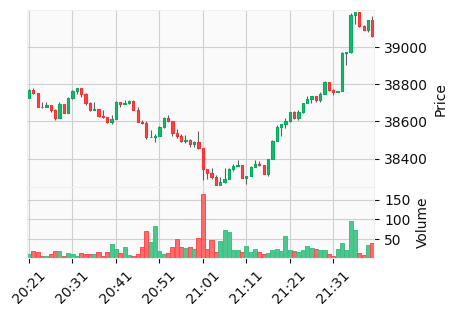

In [504]:
mpf.plot(df2[:80],
         type='candle',
         figscale=0.5,
         volume=True,
         style='yahoo',
         tight_layout=True)

### Plot lines and special marks

In [505]:
lines = [
            (str(df2.index[10]),df2['Close'][10]), 
            (str(df2.index[70]),df2['Close'][70])
        ]

In [506]:
def markersAt(df, dates):
    import numpy as np
    markers = []
    for date, value in df.T.iteritems():
        if date in dates:
            markers.append(value["High"]*1.001)
        else:
            markers.append(np.nan)
    return markers

dates1 = [df2.index[10], df2.index[30], df2.index[70]]
markers1 = markersAt(df2[:80], dates1)

dates2 = [df2.index[15], df2.index[20], df2.index[25]]
markers2 = markersAt(df2[:80], dates2)

other_plots = [
        mpf.make_addplot(df2[:80][['Close']], panel=0, linestyle='dashed', width=1),
        mpf.make_addplot(df2[:80][['Open']], panel=1, linestyle='solid', width=1, secondary_y=True),
    
        mpf.make_addplot(superdf[:80][['SUPERT_7_3.0']], panel=0, linestyle='solid', width=2, color=('b')),
        mpf.make_addplot(superdf[:80][['SUPERTl_7_3.0']], panel=0, linestyle='solid', width=2, color=('g')),
        mpf.make_addplot(superdf[:80][['SUPERTs_7_3.0']], panel=0, linestyle='solid', width=2, color=('r')),
        mpf.make_addplot(superdf[:80][['SUPERTd_7_3.0']], panel=6, linestyle='solid', width=2),
    
        mpf.make_addplot(markers1,type='scatter',markersize=200,marker='v'),
        mpf.make_addplot(markers2,type='scatter',markersize=100,marker='$\u2665$'),
    
        mpf.make_addplot(rsidf[:80], panel=2, linestyle='dotted', width=1, ylabel='RSI1', color=('r')),
        mpf.make_addplot(rsi2df[:80], panel=3, linestyle='dotted', width=1, ylabel='RSI2', color=('r')),
        mpf.make_addplot(atrdf[:80], panel=4, linestyle='dotted', width=1, ylabel='ATR1', color=('b')),
        mpf.make_addplot(atr2df[:80], panel=5, linestyle='dotted', width=1, ylabel='ATR2', color=('b'))
       ]

vlines=[str(df2.index[24]),
     str(df2.index[42])]

tdates = [(df2.index[30],df2.index[60])]

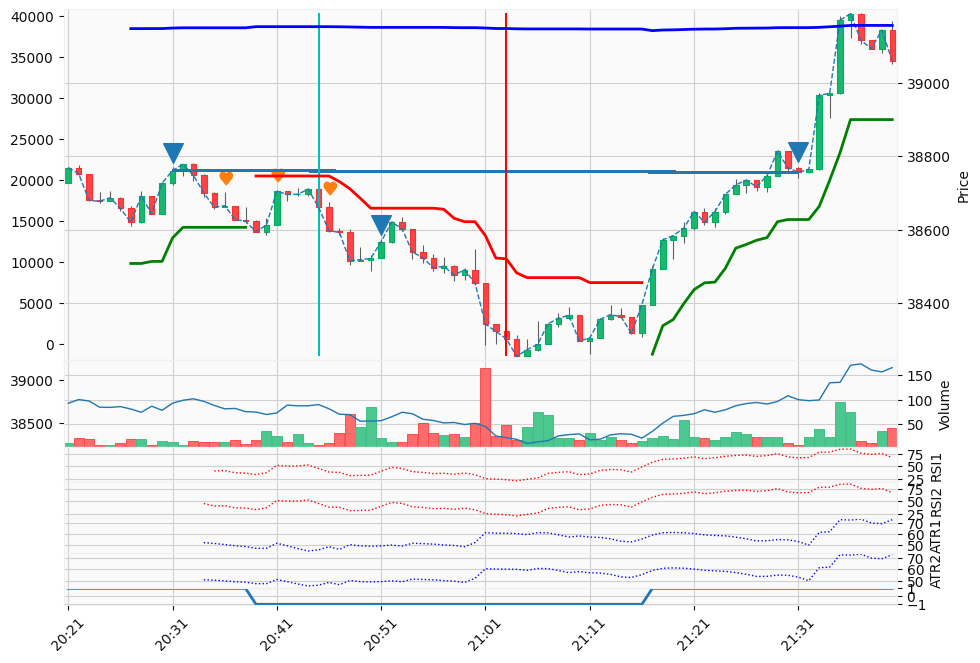

In [507]:
#valid_types = ('line','scatter','bar', 'ohlc', 'candle')

mpf.plot(df2[:80],
         type='candle',
         figscale=1.2,
         volume=True,
         style='yahoo',
         addplot=other_plots,
         alines=lines,
         vlines=dict(vlines=vlines,colors=('c','r'),linewidths=0.1),
#          tlines=[
#             dict(tlines=tdates,tline_use=['Low'],tline_method='least-squares',colors='b'),
#             dict(tlines=tdates,tline_use=['Low'],tline_method='point-to-point',colors='g')
#          ],
         tight_layout=True,
         panel_ratios=(20,5,2,2,2,2,1)
        )
#          mav=(20,50,200))

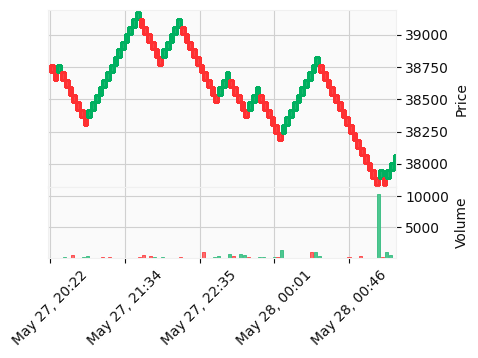

In [508]:
mpf.plot(df2[:300],figscale=0.5,type='renko',volume=True,style='yahoo', tight_layout=True)

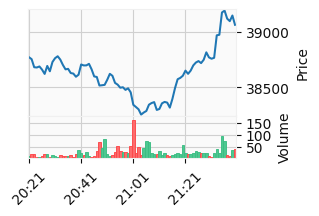

In [492]:
mpf.plot(df2[:80],figscale=0.3,type='line',volume=True,style='yahoo', tight_layout=True)